In [1]:
# Aliakbar Zarkoob, AKA "XIV"
# Gmail: XIV.Aliakbar.Zarkoob@gmail.com
# Telegram: @XIVAliakbar

def PlotRes(lon_l, lat_l, data_l, ms_l, title_l, lon_r, lat_r, data_r, ms_r, title_r, title_sup, save_flag, save_format, save_dir, save_filename, save_dpi):

    import os 
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from matplotlib.ticker import FuncFormatter

    if save_flag:
        if not os.path.isdir(save_dir):
            os.mkdir(save_dir)
    
    def format_ticks(x, pos):
        return f"{x:.0f}"

    extent = np.array([-180, 180, -90, 90])
    fig, axes = plt.subplots(
        nrows=1, ncols=2, 
        figsize=(14, 3.5),  
        subplot_kw={'projection': ccrs.PlateCarree()} 
    )

    ax1 = axes[0]
    ax1.set_extent(extent, crs=ccrs.PlateCarree())
    ax1.add_feature(cfeature.BORDERS, linestyle=':')
    ax1.add_feature(cfeature.COASTLINE)
    ax1.add_feature(cfeature.LAND, edgecolor='black', linewidth=0.5)

    sc1 = ax1.scatter(lon_l, lat_l, ms_l, data_l, cmap='turbo')
    cbar1 = fig.colorbar(sc1, ax=ax1, orientation='vertical', shrink=0.85, pad=0.02)
    cbar1.ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
    cbar1.set_label("$\\frac{m^2}{s^2}$", fontsize=18)
    ax1.set_title(title_l, fontsize=14)

    gl1 = ax1.gridlines(
        crs=ccrs.PlateCarree(),
        draw_labels=True,
        linewidth=0.5,
        color='gray',
        alpha=0.7,
        linestyle='--'
    )

    gl1.xlabel_style = {'size': 10, 'color': 'k'}
    gl1.ylabel_style = {'size': 10, 'color': 'k'}
    gl1.top_labels = False
    gl1.right_labels = False

    ax2 = axes[1]
    ax2.set_extent(extent, crs=ccrs.PlateCarree())
    ax2.add_feature(cfeature.BORDERS, linestyle=':')
    ax2.add_feature(cfeature.COASTLINE)
    ax2.add_feature(cfeature.LAND, edgecolor='black', linewidth=0.5)

    sc2 = ax2.scatter(lon_r, lat_r, ms_r, data_r, cmap='turbo')
    cbar2 = fig.colorbar(sc2, ax=ax2, orientation='vertical', shrink=0.85, pad=0.02)
    cbar2.ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
    cbar2.set_label("$\\frac{m^2}{s^2}$", fontsize=18)
    ax2.set_title(title_r, fontsize=14)

    gl2 = ax2.gridlines(
        crs=ccrs.PlateCarree(),
        draw_labels=True,
        linewidth=0.5,
        color='gray',
        alpha=0.7,
        linestyle='--'
    )

    gl2.xlabel_style = {'size': 10, 'color': 'k'}
    gl2.ylabel_style = {'size': 10, 'color': 'k'}
    gl2.top_labels = False
    gl2.right_labels = False

    plt.suptitle(title_sup, fontsize=16, fontweight='bold')
    plt.tight_layout()
    if save_flag:
        plt.savefig(save_dir+'/'+save_filename+save_format, bbox_inches='tight', dpi=save_dpi)
    plt.show()
    



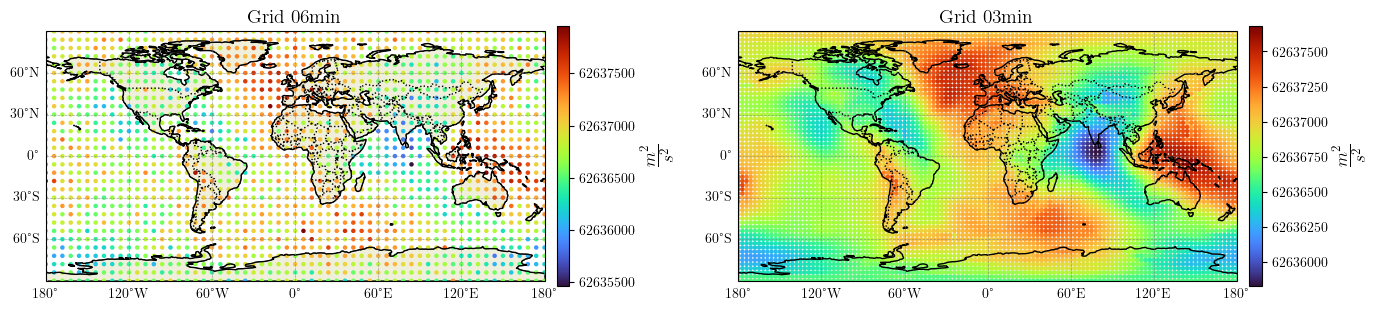

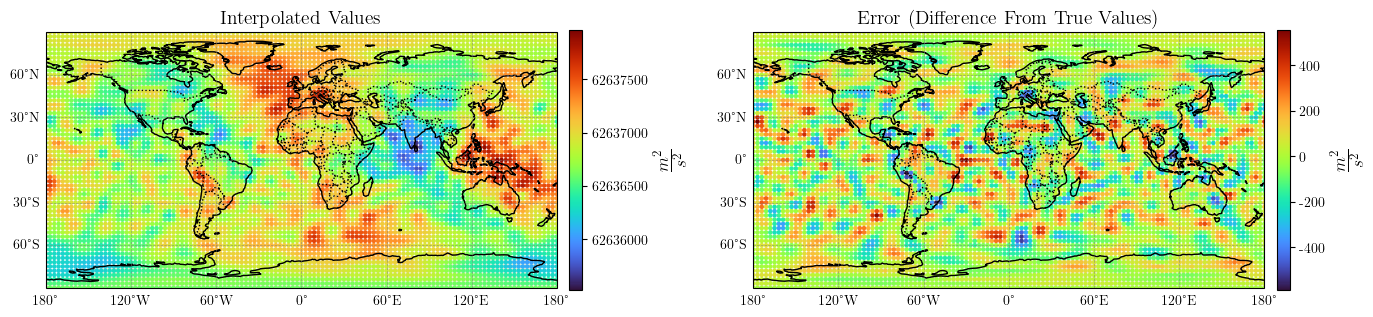

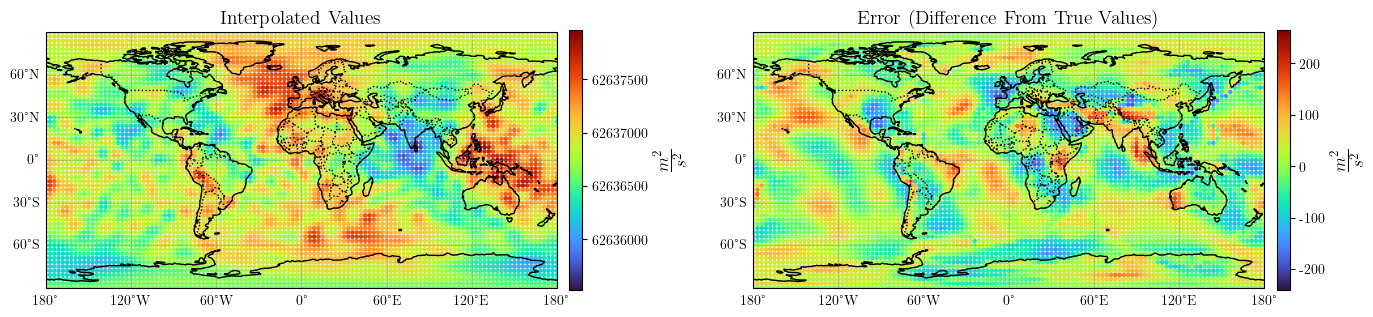

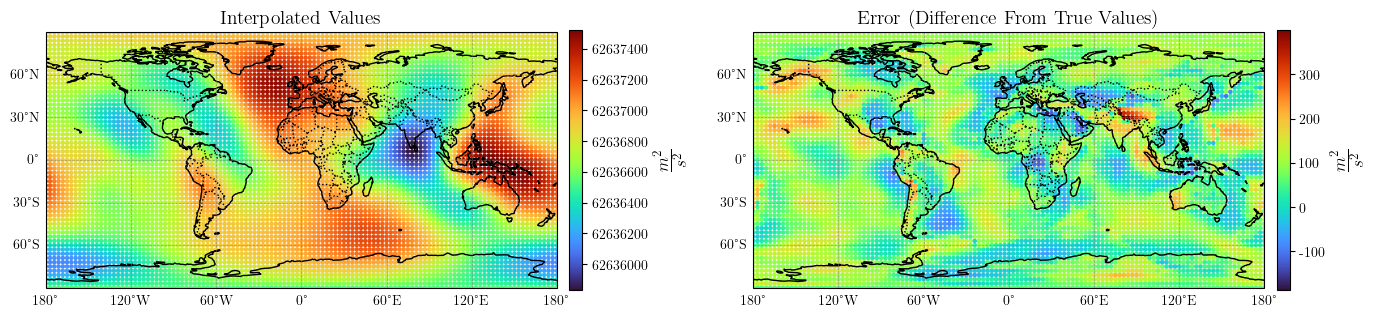

In [19]:
import matplotlib.pyplot as plt
from scipy.io import loadmat


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# AbelPoisson , Singularity , Logarithmic
kernel = 'Logarithmic' 

file_path = 'OutputNoise'+'_'+kernel+'.mat'
mat_data = loadmat(file_path)
main_data = mat_data['main_data']
valid_data = mat_data['valid_data']
int_chol = mat_data['int_chol']
int_tsvd = mat_data['int_chol']
int_vce = mat_data['int_vce']
diff_chol = mat_data['diff_chol']
diff_tsvd = mat_data['diff_tsvd']
diff_vce = mat_data['diff_vce']

save_format = '.pdf'
save_dir = './Outputs'
save_flag = True
save_dpi = 72

noise = '_Noise'

# title = 'Gravity Potential Data From XGM2019'
PlotRes(main_data[:, 0], main_data[:, 1], main_data[:, 2], 5, 'Grid 06min', 
        valid_data[:, 0], valid_data[:, 1], valid_data[:, 2], 5, 'Grid 03min',
        '', save_flag, save_format, save_dir, 'MainData'+noise, save_dpi)

# title = kernel+' - '+'Cholesky Decomposition'
PlotRes(valid_data[:, 0], valid_data[:, 1], int_chol, 5, 'Interpolated Values', 
        valid_data[:, 0], valid_data[:, 1], diff_chol, 5, 'Error (Difference From True Values)',
        '', save_flag, save_format, save_dir, kernel+'_'+'Cholesky'+noise, save_dpi)

# title = kernel+' - '+'Truncated SVD'
PlotRes(valid_data[:, 0], valid_data[:, 1], int_tsvd, 5, 'Interpolated Values', 
        valid_data[:, 0], valid_data[:, 1], diff_tsvd, 5, 'Error (Difference From True Values)',
        '', save_flag, save_format, save_dir, kernel+'_'+'TSVD'+noise, save_dpi)

# title = kernel+' - '+'Tikhonov with Variance Component Estimation'
PlotRes(valid_data[:, 0], valid_data[:, 1], int_vce, 5, 'Interpolated Values', 
        valid_data[:, 0], valid_data[:, 1], diff_vce, 5, 'Error (Difference From True Values)',
        '', save_flag, save_format, save_dir, kernel+'_'+'VCE'+noise, save_dpi)

In [20]:
import numpy as np


print(np.mean(diff_tsvd))
print(np.mean(diff_chol))
print(np.mean(diff_vce))

print(np.linalg.norm(diff_tsvd))
print(np.linalg.norm(diff_chol))
print(np.linalg.norm(diff_vce))


7.511199454892144
7.375740253943292
74.24441046330433
5155.901281953596
12404.664851996737
8167.3250910173465


In [ ]:
mat_data = loadmat('Picard_test.mat')
pp = mat_data['pp']

plt.figure(figsize=(8,5))
plt.semilogy(pp[:,0], marker='.', linestyle='none', color='k', label='$\\sigma_i$')
plt.semilogy(pp[:,1], marker='.', linestyle='none', color='b', label='$|u_i^Ty|$')
plt.semilogy(pp[:,2], marker='.', linestyle='none', color='r', label='$\\frac{|u_i^Ty|}{\\sigma_i}$')
plt.legend(fontsize=16)
plt.grid()
plt.tight_layout()
if save_flag:
    plt.savefig(save_dir+'/'+'PicardPlot'+save_format, bbox_inches='tight', dpi=save_dpi)
plt.show()


mat_data = loadmat('NoRegResult.mat')
int_A = mat_data['int_A']
diff_A = mat_data['diff_A']

PlotRes(valid_data[:, 0], valid_data[:, 1], int_A, 5, 'Interpolated Values', 
        valid_data[:, 0], valid_data[:, 1], diff_A, 5, 'Error (Difference From True Values)',
        '', save_flag, save_format, save_dir, 'NoRegResult', save_dpi)